In [ ]:
import pickle
with open("/content/ds_array_4.pkl", "rb") as f:
    state = pickle.load(f)
state

<xarray.Dataset>
Dimensions:             (time: 1, y: 13, x: 20)
Coordinates:
  * x                   (x) float32 -109.3 -109.2 -109.1 ... -107.5 -107.4
  * y                   (y) float32 44.55 44.45 44.35 ... 43.55 43.45 43.35
  * time                (time) datetime64[ns] 2022-01-31
    spatial_ref         int64 0
Data variables:
    precipitation       (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    runoff              (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    underground_runoff  (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    soilmoisture        (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    sub_soilmoisture    (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    shapefile           (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    history:          Created on 2022-02-05 07:15
    input_data_hash:  27d78e1ad0241438dcb7b796dee6d7c1393f1b4522680997748376e...

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Liberaries

In [ ]:
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
!which python

/home/mahdi/miniconda3/bin/python


In [24]:
import os
import sys
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
import geopandas as gpd
import ee
import wxee
import geemap
import rioxarray
import rasterio
import pickle
from qdwb.primary_surface_flow.primary_surface_flow import *
from qdwb.primary_surface_flow.asset import *
from qdwb.coordinate.extract import *

sys.path.append('/content/drive/MyDrive/WaterBalance/')

In [15]:
ee.Authenticate()
wxee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=5vxxjNwmR6gIXwQ3wbyt8C2AK59rjybrWk0d0GTtHeY&tc=hBcubSB0FtA8Zli4vytME_QK9hafKrvr1GFXAOABPjA&cc=TEyl9BG2tgHA6cMOHmOkxl4fr-WVmxR4ioklKdeZ55Y

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VNWju2LHJPQL5m_bYBJ59PAPgQSZepDWTlQMd79-WYiAlvV9MyXdPE

Successfully saved authorization token.


# Varables

In [16]:
PATH_DATA = "/content/drive/MyDrive/WaterBalance/assets/"

# mashhad
# LAT_MIN = 35.80
# LAT_MAX = 37.11
# LON_MIN = 58.31
# LON_MAX = 60.14

# USA
LAT_MIN = 43.30
LAT_MAX = 44.60
LON_MIN = -109.40
LON_MAX = -107.40


# Functions

In [17]:
def mask_nc_file(
    nc,
    variable,
    lat_min,
    lat_max,
    lon_min,
    lon_max
):
    with xr.open_dataset(nc) as xr_nc:
        result = xr_nc.sel(
            lat = slice(lat_max, lat_min),
            lon = slice(lon_min, lon_max),
        )
    return result

# Load Data

In [18]:
# mm d-1 - precipitation
P = mask_nc_file(
    nc = PATH_DATA + "nc/P_2022031.nc",
    variable = "precipitation",
    lat_min = LAT_MIN,
    lat_max = LAT_MAX,
    lon_min = LON_MIN,
    lon_max = LON_MAX
)
 
# mashhad = gpd.read_file('/mnt/e/Term2/WERI/test/Export_Output.shp')

usa = gpd.read_file(PATH_DATA + "shape/usa.shp")


In [19]:


# Map = geemap.Map()
# Map.add_basemap('HYBRID')


shape = ee.Geometry.Rectangle([LON_MAX,LAT_MIN,LON_MIN,LAT_MAX])


# Import the GCN250 Images and rename bands
# GCN250_Average =  ee.Image("users/jaafarhadi/GCN250/GCN250Average").select('b1').rename('average')
CN_Wyoming =  ee.Image("users/jaafarhadi/GCN250/GCN250Dry").select('b1').rename('dry')
# GCN250_Wet = ee.Image("users/jaafarhadi/GCN250/GCN250Wet").select('b1').rename('wet')


CN_Wyoming = CN_Wyoming.clip(shape)
 
# Map.centerObject(shape, 9)
# Map.addLayer(CN_Wyoming, {'min':40, 'max':75, 'palette': ['Red','SandyBrown','Yellow','LimeGreen', 'Blue','DarkBlue']}, 'CN_Wyoming')
# Map

In [20]:
CN_Wyoming = CN_Wyoming.set("system:time_start", ee.Date("2015"))
arr = CN_Wyoming.wx.to_xarray(scale=250, crs='EPSG:4326')
arr

Downloading:   0%|          | 0.00/64.1k [00:00<?, ?iB/s]

<xarray.Dataset>
Dimensions:  (time: 1, y: 582, x: 892)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01
  * y        (y) float64 44.6 44.6 44.6 44.6 44.6 ... 43.31 43.31 43.3 43.3 43.3
  * x        (x) float64 -109.4 -109.4 -109.4 -109.4 ... -107.4 -107.4 -107.4
Data variables:
    dry      (time, y, x) float64 nan nan nan nan nan ... 59.0 59.0 59.0 59.0
Attributes:
    transform:               (0.002245788210298804, 0.0, -109.40132687649593,...
    crs:                     +init=epsg:4326
    res:                     (0.002245788210298804, 0.002245788210298804)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

## reroject CN array accoring to precipitation array

In [21]:

da = arr.rio.write_crs("epsg:4326", inplace=True)

P.rio.write_crs("epsg:4326", inplace=True)

p = P.rename({'lon': 'x','lat': 'y'})

xds_repr_match = da.rio.reproject_match(p, resampling = rasterio.enums.Resampling.nearest)
xds_repr_match


<xarray.Dataset>
Dimensions:      (x: 20, y: 13, time: 1)
Coordinates:
  * x            (x) float32 -109.3 -109.2 -109.1 ... -107.6 -107.5 -107.4
  * y            (y) float32 44.55 44.45 44.35 44.25 ... 43.65 43.55 43.45 43.35
  * time         (time) datetime64[ns] 2015-01-01
    spatial_ref  int64 0
Data variables:
    dry          (time, y, x) float64 53.0 53.0 55.0 57.0 ... 64.0 64.0 64.0
Attributes:
    transform:               (0.002245788210298804, 0.0, -109.40132687649593,...
    res:                     (0.002245788210298804, 0.002245788210298804)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

## plot reprojected CN array

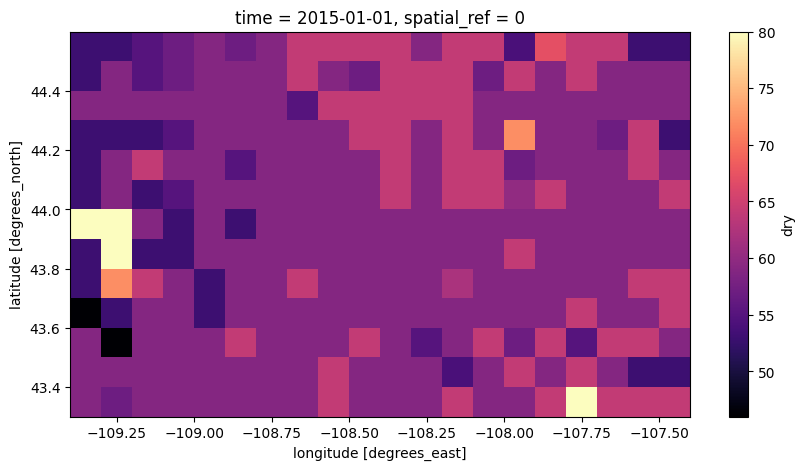

In [22]:
xds_repr_match.dry.plot(figsize=(10, 5), cmap="magma")

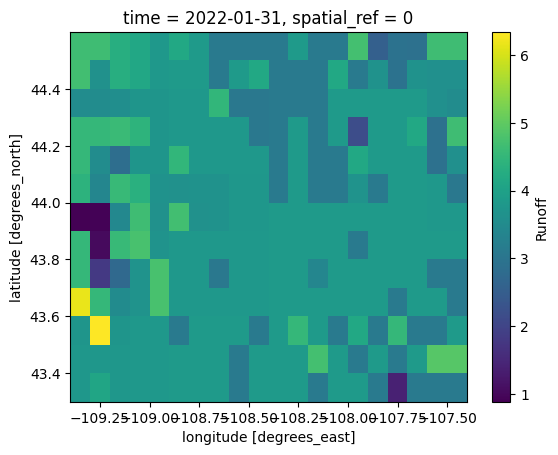

In [25]:
cn =list(xds_repr_match.dry.values.flatten())
pre =list(p.precipitation.values.flatten())

R = np.array([PrimarySurfaceFlow.scs(
    precipitation = float(i),
    curve_number = float(j),
    rsa = True,
    antecedent_precipitation = 100,
    is_growing_season = True
)[0]
for i, j in zip(pre,cn)])

underground_runoff = np.array([PrimarySurfaceFlow.scs(
    precipitation = float(i),
    curve_number = float(j),
    rsa = True,
    antecedent_precipitation = 100,
    is_growing_season = True
)[1]
for i, j in zip(pre,cn)])

R_array = R.reshape(1,13,20)
underground_runoff_array = underground_runoff.reshape(1,13,20)


ds_array = p.assign(Runoff=(['time', 'y', 'x'], R_array))
ds_array_1 = ds_array.assign(underground_runoff=(['time', 'y', 'x'], underground_runoff_array))
ds_array_1.Runoff.plot()


In [26]:
# Map = geemap.Map()
# Map.add_basemap('HYBRID')

soilmoisture = ee.ImageCollection('NASA_USDA/HSL/SMAP10KM_soil_moisture').filter(ee.Filter.date('2022-01-31T00:00:00', '2022-02-01T00:00:00')).select('ssm').mean().clip(shape)

sub_soilmoisture = ee.ImageCollection('NASA_USDA/HSL/SMAP10KM_soil_moisture').filter(ee.Filter.date('2022-01-31T00:00:00', '2022-02-01T00:00:00')).select('susm').mean().clip(shape)
# Map.centerObject(shape, 9)
# Map.addLayer(soilmoisture, {'min':0, 'max':28, 'palette': ['0300ff', '418504', 'efff07', 'efff07', 'ff0303']}, 'soilmoisture')
# Map

In [27]:
soilmoisture = soilmoisture.set("system:time_start", ee.Date("2022"))
sub_soilmoisture = sub_soilmoisture.set("system:time_start", ee.Date("2022"))


arr_soilmoisture = soilmoisture.wx.to_xarray(scale=10000, crs='EPSG:4326')
arr_sub_soilmoisture = sub_soilmoisture.wx.to_xarray(scale=10000, crs='EPSG:4326')
arr_sub_soilmoisture

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?iB/s]

<xarray.Dataset>
Dimensions:  (time: 1, y: 15, x: 23)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01
  * y        (y) float64 44.6 44.51 44.42 44.33 ... 43.61 43.52 43.43 43.34
  * x        (x) float64 -109.4 -109.3 -109.2 -109.1 ... -107.6 -107.5 -107.4
Data variables:
    susm     (time, y, x) float32 69.84 69.84 79.21 49.7 ... 48.75 48.75 80.62
Attributes:
    transform:               (0.08983152841195215, 0.0, -109.41480160575772, ...
    crs:                     +init=epsg:4326
    res:                     (0.08983152841195215, 0.08983152841195215)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

In [28]:
da_soilmoisture = arr_soilmoisture.rio.write_crs("epsg:4326", inplace=True)
da_sub_soilmoisture = arr_sub_soilmoisture.rio.write_crs("epsg:4326", inplace=True)

xds_repr_match__soilmoisture = da_soilmoisture.rio.reproject_match(p, resampling = rasterio.enums.Resampling.nearest)
xds_repr_match__sub_soilmoisture = da_sub_soilmoisture.rio.reproject_match(p, resampling = rasterio.enums.Resampling.nearest)

xds_repr_match__sub_soilmoisture

<xarray.Dataset>
Dimensions:      (x: 20, y: 13, time: 1)
Coordinates:
  * x            (x) float32 -109.3 -109.2 -109.1 ... -107.6 -107.5 -107.4
  * y            (y) float32 44.55 44.45 44.35 44.25 ... 43.65 43.55 43.45 43.35
  * time         (time) datetime64[ns] 2022-01-01
    spatial_ref  int64 0
Data variables:
    susm         (time, y, x) float32 67.88 67.88 46.5 ... 66.51 48.75 48.75
Attributes:
    transform:               (0.08983152841195215, 0.0, -109.41480160575772, ...
    res:                     (0.08983152841195215, 0.08983152841195215)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

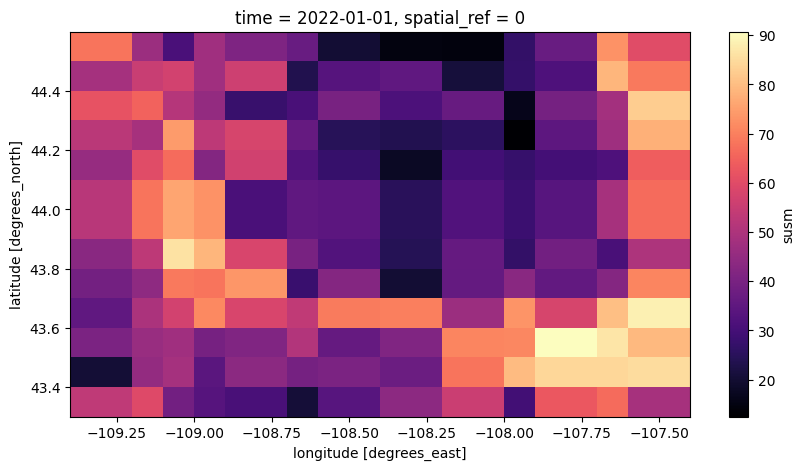

In [29]:
xds_repr_match__sub_soilmoisture.susm.plot(figsize=(10, 5), cmap="magma")

In [30]:
cn = list(xds_repr_match.dry.values.flatten())
pre = list(p.precipitation.values.flatten())
soil = list(xds_repr_match__soilmoisture.ssm.values.flatten())
sub_soil = list(xds_repr_match__sub_soilmoisture.susm.values.flatten())

runoff_array = np.array([PrimarySurfaceFlow.scs(
    precipitation = float(i),
    curve_number = float(j),
    rsa = True,
    antecedent_precipitation = float(z),
    is_growing_season = True
)[0]
for i, j, z in zip(pre, cn, soil)])

underground_runoff_array = np.array([PrimarySurfaceFlow.scs(
    precipitation = float(i),
    curve_number = float(j),
    rsa = True,
    antecedent_precipitation = float(z),
    is_growing_season = True
)[1]
for i, j, z in zip(pre, cn, soil)])

soil_array = np.array(soil)
sub_soil_array = np.array(sub_soil)


runoff_array = runoff_array.reshape(1,13,20)
underground_runoff_array = underground_runoff_array.reshape(1,13,20)
soil_array = soil_array.reshape(1,13,20)
sub_soil_array = sub_soil_array.reshape(1,13,20)

ds_array = p.assign(runoff=(['time', 'y', 'x'], runoff_array))
ds_array_1 = ds_array.assign(underground_runoff=(['time', 'y', 'x'], underground_runoff_array))
ds_array_2 = ds_array_1.assign(soilmoisture=(['time', 'y', 'x'], soil_array))
ds_array_3 = ds_array_2.assign(sub_soilmoisture=(['time', 'y', 'x'], sub_soil_array))


ds_array_3



<xarray.Dataset>
Dimensions:             (x: 20, y: 13, time: 1)
Coordinates:
  * x                   (x) float32 -109.3 -109.2 -109.1 ... -107.5 -107.4
  * y                   (y) float32 44.55 44.45 44.35 ... 43.55 43.45 43.35
  * time                (time) datetime64[ns] 2022-01-31
    spatial_ref         int64 0
Data variables:
    precipitation       (time, y, x) float32 0.4375 0.4375 0.375 ... 0.0 0.0 0.0
    runoff              (time, y, x) float64 11.02 11.02 10.18 ... 17.01 17.01
    underground_runoff  (time, y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    soilmoisture        (time, y, x) float32 24.87 24.87 16.27 ... 12.07 12.07
    sub_soilmoisture    (time, y, x) float32 67.88 67.88 46.5 ... 48.75 48.75
Attributes:
    history:          Created on 2022-02-05 07:15
    input_data_hash:  27d78e1ad0241438dcb7b796dee6d7c1393f1b4522680997748376e...

In [31]:


shp_dir = PATH_DATA + "shape/usa.shp"
shapefile = gpd.read_file(shp_dir)


precip_da = add_shape_coord_from_data_array(ds_array_3, shp_dir, "shapefile")
ds_array_4 = ds_array_3.where(precip_da.shapefile==0, other=np.nan)



with open('/content/drive/MyDrive/WaterBalance/notebook/ds_array_4.pkl', 'wb') as f:
    pickle.dump(ds_array_4, f)

ds_array_4


<xarray.Dataset>
Dimensions:             (time: 1, y: 13, x: 20)
Coordinates:
  * x                   (x) float32 -109.3 -109.2 -109.1 ... -107.5 -107.4
  * y                   (y) float32 44.55 44.45 44.35 ... 43.55 43.45 43.35
  * time                (time) datetime64[ns] 2022-01-31
    spatial_ref         int64 0
Data variables:
    precipitation       (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    runoff              (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    underground_runoff  (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    soilmoisture        (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    sub_soilmoisture    (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    shapefile           (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    history:          Created on 2022-02-05 07:15
    input_data_hash:  27d78e1ad0241438dcb7b796dee6d7c1393f1b4522680997748376e...

In [ ]:
Map = geemap.Map()
Map.add_basemap('HYBRID')

dem = ee.Image("USGS/SRTMGL1_003").clip(shape)

Map.centerObject(shape, 9)
Map.addLayer(ee_object = dem, vis_params = {'min':-10, 'max':6500}, name = 'dem')
Map

Map(center=[43.95199004841242, -108.40000000000003], controls=(WidgetControl(options=['position', 'transparent…